<a href="https://colab.research.google.com/github/beniamine3155/deep_learning_tensorflow/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Creating data to view and fit

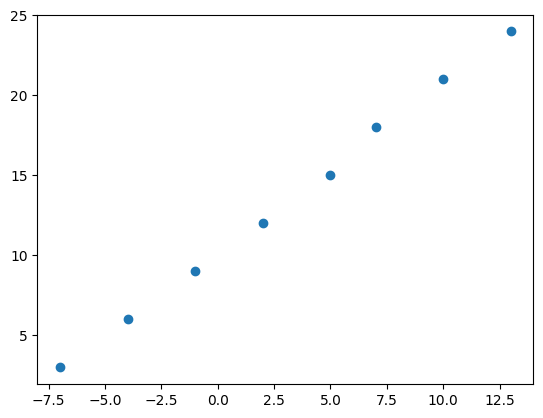

In [2]:
# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 7.0, 10.0, 13.0])

# create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, Y)

## Regression input shapes and output shapes

In [3]:
# input and output shape of a regression model
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

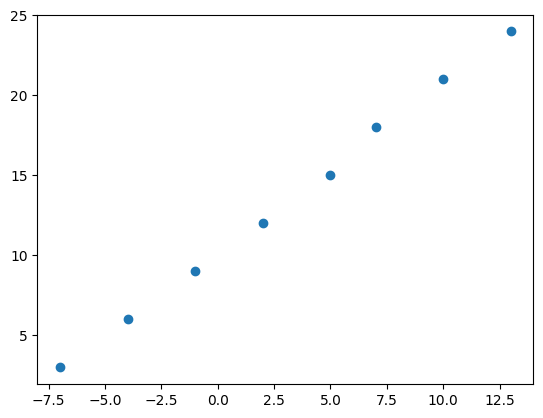

In [5]:
# create features using tensor
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 7.0, 10.0, 13.0])

# create labels using tensor
Y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [6]:
# taking a single example of X
input_shape = X[0].shape

# taking a single example of Y
output_shape = Y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [7]:
# look at the single examples invidually
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Steps in modelling with TensorFlow

In [8]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae, # mae -> mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
    metrics = ['mae']
)

# fit the model
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 1s 883ms/step - loss: 12.2549 - mae: 12.2549
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 12.1472 - mae: 12.1472
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 12.0395 - mae: 12.0395
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 11.9319 - mae: 11.9319
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 11.8242 - mae: 11.8242


In [9]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  7., 10., 13.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 186ms/step


array([[9.479803]], dtype=float32)

## Improving a model

In [11]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss = tf.keras.losses.mae, # mae -> mean absolute error
    optimizer = tf.keras.optimizers.SGD(), # SGD -> Stochastic Gradient Descent
    metrics = ['mae']
)

# fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), Y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 706ms/step - loss: 9.4060 - mae: 9.4060
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 9.2983 - mae: 9.2983
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1907 - mae: 9.1907
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.0830 - mae: 9.0830
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 8.9754 - mae: 8.9754
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8677 - mae: 8.8677
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.7601 - mae: 8.7601
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 8.6524 - mae: 8.6524
Epoch 9/100
1/1 [==============================] - 0s 27ms/step - loss: 8.5447 - mae: 8.5447
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 8.4371 - mae: 8.4371
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - l

In [12]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  7., 10., 13.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)


1/1 [==============================] - 0s 263ms/step


array([[31.441355]], dtype=float32)

## Evaluating a model

In [14]:
# create a biggeer dataset
X = np.arange(-100, 100,  4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [15]:
# make label for the dataset
Y = np.arange(-90, 110, 4)
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [16]:
Y = X + 10
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

In [17]:
# check how many samples we have
len(X)

50

In [18]:
# split data into train and test set
X_train = X[:40] # first 40 examples (80% of data)
Y_train = Y[:40]

X_test = X[40:] # last 10 examples (20% of data)
Y_test = Y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

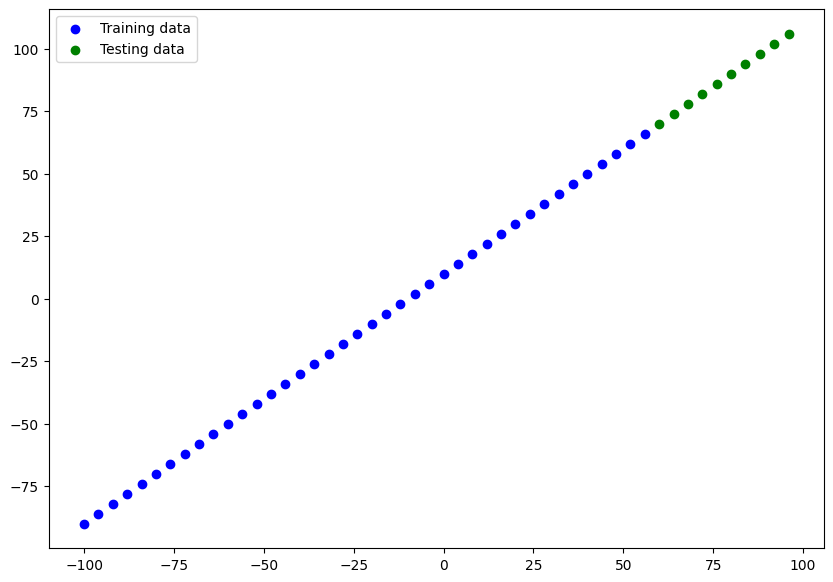

In [19]:
plt.figure(figsize = (10, 7))
plt.scatter(X_train, Y_train, c = 'b', label = 'Training data')
plt.scatter(X_test, Y_test, c = 'g', label =  'Testing data')
plt.legend()

## Visualizing the model

In [20]:
# set random seed
tf.random.set_seed(42)

# create a model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)


In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# fit the model to the training data
model.fit(X_train, Y_train, epochs = 100, verbose =0 ) # verbose controls how much gets output


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


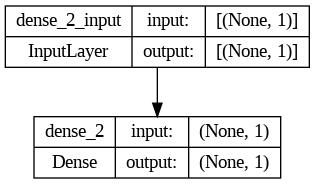

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

## Visualizing the predictions

In [25]:
# make predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 69ms/step


array([[ 74.62461 ],
       [ 79.51263 ],
       [ 84.40064 ],
       [ 89.28866 ],
       [ 94.176674],
       [ 99.06469 ],
       [103.952705],
       [108.84072 ],
       [113.72874 ],
       [118.61675 ]], dtype=float32)

In [26]:
def plot_predictions(
    train_data = X_train,
    train_labels = Y_train,
    test_data = X_test,
    test_labels = Y_test,
    predictions = y_preds):
  plt.figure(figsize = (10, 7))
  plt.scatter(train_data, train_labels, c = 'b', label = "Training data")
  plt.scatter(test_data, test_labels, c = 'g', label = "Testing data")
  plt.scatter(test_data, predictions, c = 'r', label = "Predictions")
  plt.legend()

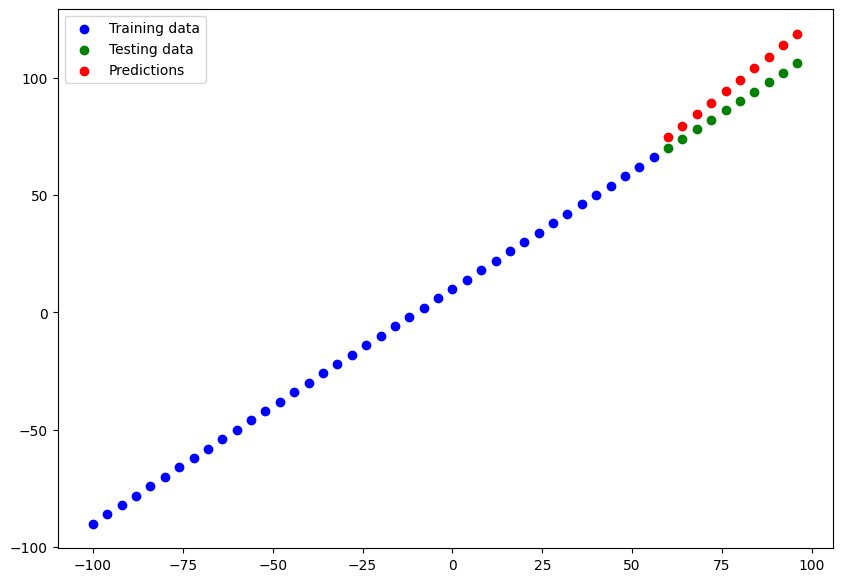

In [27]:
plot_predictions(
    train_data = X_train,
    train_labels = Y_train,
    test_data = X_test,
    test_labels = Y_test,
    predictions = y_preds)

## Evaluating predictions


In [28]:
# evaluate the model on the test set
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 244ms/step - loss: 8.6207 - mae: 8.6207


[8.620681762695312, 8.620681762695312]

In [29]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(
    y_true = Y_test,
    y_pred = y_preds
)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([14.425234, 11.79495 , 10.319872, 10.      , 10.870669, 13.038814,
       16.362164, 20.840721, 25.728735, 30.616755], dtype=float32)>

In [30]:
# check the test labels tensor value
Y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [31]:
# check the predictions tensor values
y_preds

array([[ 74.62461 ],
       [ 79.51263 ],
       [ 84.40064 ],
       [ 89.28866 ],
       [ 94.176674],
       [ 99.06469 ],
       [103.952705],
       [108.84072 ],
       [113.72874 ],
       [118.61675 ]], dtype=float32)

In [32]:
# check the tensor shape
Y_test.shape, y_preds.shape

((10,), (10, 1))

In [33]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [34]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [35]:
# What do they look like?
Y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ 74.62461 ,  79.51263 ,  84.40064 ,  89.28866 ,  94.176674,
         99.06469 , 103.952705, 108.84072 , 113.72874 , 118.61675 ],
       dtype=float32))

In [36]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=8.620682>

In [37]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=80.82188>

In [38]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(Y_test - y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=8.620681762695312>

In [39]:
# make functions for our evaluation metrics
def mae(Y_test, y_preds):
    return tf.metrics.mean_absolute_error(Y_test, y_preds)


def mse(Y_test, y_preds):
    return tf.metrics.mean_squared_error(Y_test, y_preds)



## Running experiments to improve a model


we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

### Build model_1

In [40]:
# set random seed
tf.random.set_seed(42)

# replicate original model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 85.2619 - mae: 85.2619
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 49.8064 - mae: 49.8064
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 15.0019 - mae: 15.0019
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 8.1441 - mae: 8.1441
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.7332 - mae: 10.7332
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.9317 - mae: 9.9317
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.9929 - mae: 8.9929
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.1034 - mae: 9.1034
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 19.7631 - mae: 19.7631
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.6944 - mae: 10.6944
Epoch 11/100
2/2 [==============================] - 0s 14m

1/1 [==============================] - 0s 109ms/step


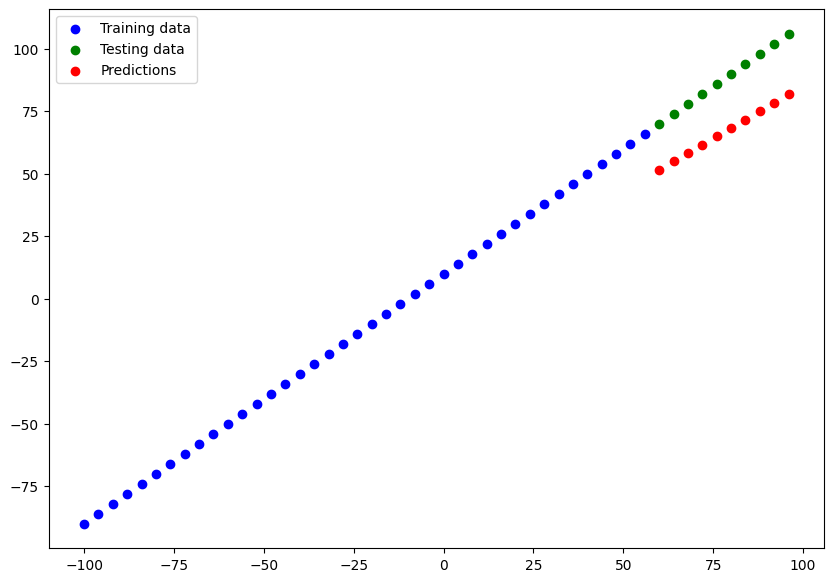

In [41]:
# make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [43]:
# calculate model_1 metrics
mae_1 = mae(Y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(Y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(21.322433, 458.0927)

### Build model_2
This time we'll add an extra dense layer

In [44]:
# set random seed
tf.random.set_seed(42)

# replicate model_1 and add extra dense layer
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # add extra dense layer
])

# compile the model
model_2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1) , Y_train, epochs = 100, verbose = 0) # set verbose to 0 for less output


1/1 [==============================] - 0s 164ms/step


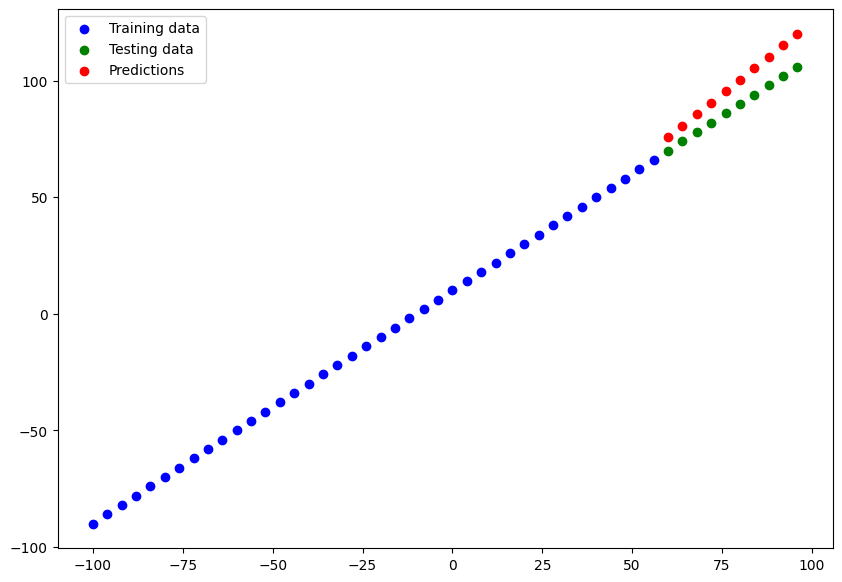

In [45]:
# make and plot prediction for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [46]:
# calculate model_2 metrics
mae_2 = mae(Y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(Y_test, y_preds_2.squeeze()).numpy()

mae_2, mse_2

(9.86426, 104.43821)

### Build model_3

this time we'll train for longer (500 epochs instead of 100).

In [47]:
# set random seed
tf.random.set_seed(42)

# replicate model_1 and add extra dense layer
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # add extra dense layer
])

# compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# fit the model (this time epochs = 500 not 100 )
model_3.fit(tf.expand_dims(X_train, axis = -1) , Y_train, epochs = 500, verbose = 0) # set verbose to 0 for less output


1/1 [==============================] - 0s 95ms/step


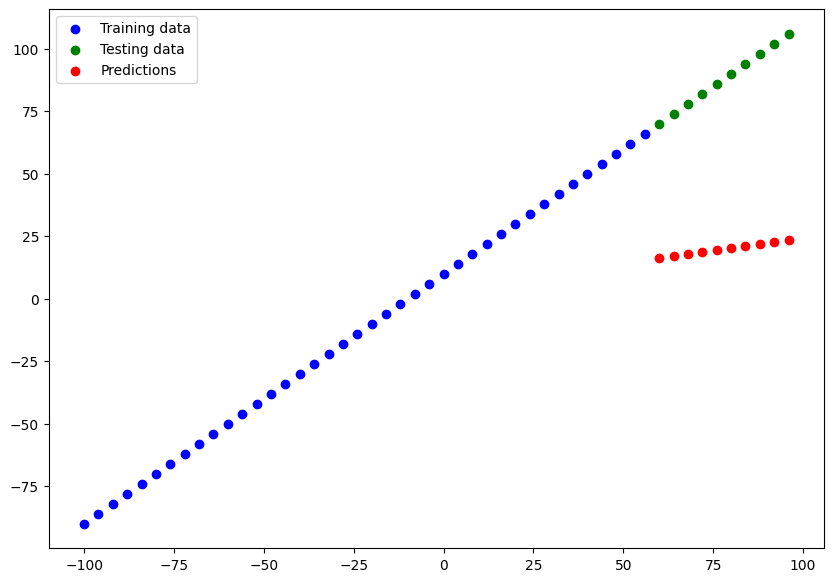

In [48]:
# make and plot prediction for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [49]:
# calculate model_3 metrics
mae_3 = mae(Y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(Y_test, y_preds_3.squeeze()).numpy()

mae_3, mse_3

(68.0608, 4717.1475)

## Comparing Results

In [51]:
model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3]]

In [53]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns = ['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,21.322433,458.092712
1,model_2,9.864260,104.438210
2,model_3,68.060799,4717.147461


From our experiments, it looks like model_2 performed the best.

## Saving a model

In [54]:
# save a model using the SaveModel format
model_2.save('best_model_SaveModel_format')

In [55]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

ls: cannot access 'best_model_SavedModel_format': No such file or directory


In [56]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


## Loading a model

In [58]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

OSError: No file or directory found at best_model_SavedModel_format

In [59]:

# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(Y_test, saved_model_preds.squeeze()).numpy() == mae(Y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 58ms/step


NameError: name 'loaded_saved_model' is not defined

In [60]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(Y_test, h5_model_preds.squeeze()).numpy() == mae(Y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 21ms/step


True

## Downloading a model (from Google Colab)

In [63]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A larger example

In [64]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [66]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [75]:
# turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance, dtype = int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [76]:
# Create X & y values
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]

In [77]:
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [78]:
# create training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=42)

In [79]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8621.7695 - mae: 8621.7695
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7865.5459 - mae: 7865.5459
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7604.0229 - mae: 7604.0229
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7511.3296 - mae: 7511.3296
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7768.2842 - mae: 7768.2842
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7655.1226 - mae: 7655.1226
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7478.3491 - mae: 7478.3491
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7790.1143 - mae: 7790.1143
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7585.2910 - mae: 7585.2910
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7641.4463 - mae: 7641.4463

In [80]:
# Check the results of the insurance model
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7108.1934 - mae: 7108.1934


[7108.193359375, 7108.193359375]

Our model didn't perform very well, let's try a bigger model.

We'll try 3 things:

Increasing the number of layers (2 -> 3).

Increasing the number of units in each layer (except for the output layer).

Changing the optimizer (from SGD to Adam).

In [81]:

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train, Y_train, epochs=100, verbose=0)

In [82]:
# Evaluate our larger model
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 10ms/step - loss: 4882.1851 - mae: 4882.1851


[4882.18505859375, 4882.18505859375]

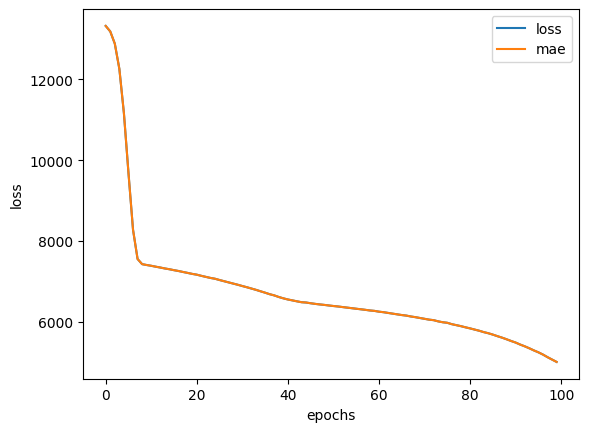

In [83]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [84]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, Y_train, epochs=100, verbose=0)

In [85]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, Y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 3ms/step - loss: 3496.1582 - mae: 3496.1582


(3496.158203125, 3496.158203125)

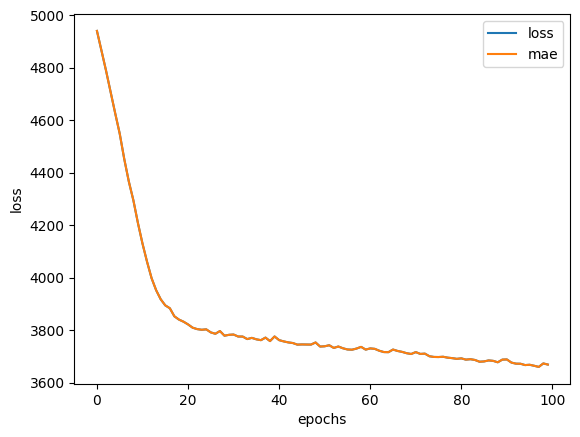

In [86]:
# Plot the model trained for 200 total epochs loss curves
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

## Preprocessing data (normalization and standardization)

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")



In [89]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [92]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [93]:
# Normalized and one-hot encoded example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [94]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [95]:
# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [96]:
# Evaulate 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.3013 - mae: 3169.3013


In [97]:
# Compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3496.158203125, 3169.30126953125)